In [1]:
import pandas as pd
import numpy as np

data = pd.read_json('trump_tweets_2009~2018.json')

In [2]:
data.tail()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
33335,2018-01-10 04:23:58,60252,950946293077209088,NaN,False,13822,Twitter for iPhone,".@ICEgov HSI agents and ERO officers, on behal..."
33336,2018-01-10 03:48:26,51951,950937350003183616,NaN,False,11893,Twitter for iPhone,Thank you @GOPLeader Kevin McCarthy! Couldn’t ...
33337,2018-01-10 00:16:57,123413,950884128379035648,NaN,False,24552,Twitter for iPhone,"As I made very clear today, our country needs ..."
33338,2018-01-09 23:59:38,0,950879772644659200,NaN,True,11716,Twitter for iPhone,"RT @Scavino45: “Utilities cutting rates, cite ..."
33339,2018-01-09 23:07:09,82151,950866561153331200,NaN,False,19481,Twitter for iPhone,"Today, it was my great honor to sign a new Exe..."


In [3]:
mean_length = np.mean([len(i) for i in data.text])
print("The lenght's average in tweets: %.2f" % mean_length)

The lenght's average in tweets: 111.56


In [4]:
fav_max = data[data.favorite_count == data.favorite_count.max()]
rt_max = data[data.retweet_count == data.retweet_count.max()]
print('The tweets with more like:\n{}'.format(fav_max.text.values[0]))
print('Numbers of like: {}'.format(fav_max.favorite_count.values[0]))
print()
print('The tweets with more reweet:\n{}'.format(rt_max.text.values[0]))
print('Numbers of reweet: {}'.format(rt_max.retweet_count.values[0]))

The tweets with more like:
Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before
Numbers of like: 633253

The tweets with more reweet:
#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
Numbers of reweet: 369530


In [5]:
fav_count = pd.Series(data=data.favorite_count.values,index=data.created_at)
rt_count = pd.Series(data=data.retweet_count.values,index=data.created_at)

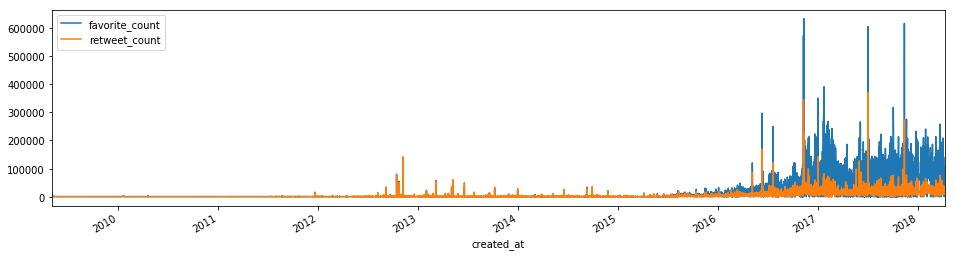

In [6]:
%matplotlib inline
fav_count.plot(figsize=(16,4), label="favorite_count", legend=True)
rt_count.plot(figsize=(16,4), label="retweet_count", legend=True);

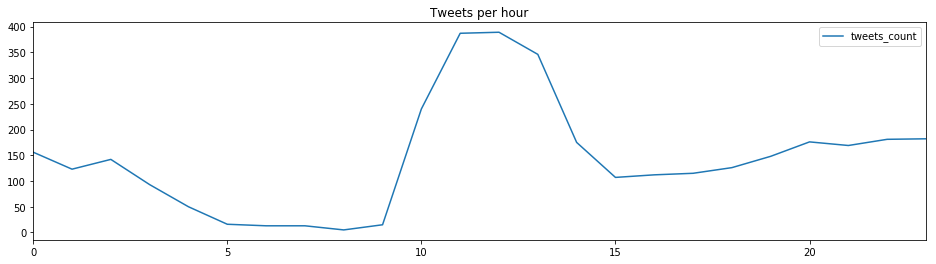

In [7]:
hours = list({t.hour for t in fav_count.index})
temp = {}
for h in hours:
    c = 0
    for t in fav_count['2016-11':'2018'].index:
        if t.hour == h:
            c += 1
    temp[h] = c
pd.Series(temp).plot(figsize=(16,4), label="tweets_count", legend=True, title='Tweets per hour');

In [8]:
sources = data[['source']]
sources['source_count'] = 1
sources = sources.groupby('source').agg('count').sort_values(by='source_count',ascending=False).reset_index()
print('Creation of content sources:')
sources

Creation of content sources:


E:\python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,source,source_count
0,Twitter for Android,14545
1,Twitter Web Client,12176
2,Twitter for iPhone,5000
3,TweetDeck,483
4,TwitLonger Beta,405
5,Media Studio,134
6,Instagram,133
7,Facebook,105
8,Twitter for BlackBerry,97
9,Twitter Ads,97


E:\python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


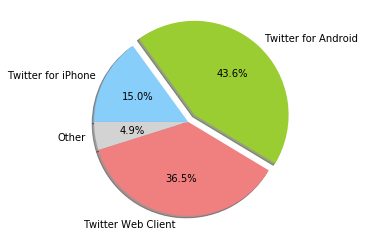

In [9]:
# Pie charts of sources
sources.source[sources.source_count<5000] = 'Other'
sources = sources.groupby('source').agg('sum').reset_index()

import matplotlib.pyplot as plt
labels=sources.source.values
sizes=sources.source_count.values
colors=['lightgray','lightcoral','yellowgreen','lightskyblue']
explode=0,0,0.1,0

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=180)
plt.axis('equal')
plt.show()

In [10]:
# df_ad = data[data.source == 'Twitter for Android']
# df_ip = data[data.source == 'Twitter for iPhone']
# df_other = data[(data.source != 'Twitter for Android') & (data.source != 'Twitter for iPhone')]
# def get_tweets_by_source(df_source):
#     df_source.index = df_source.created_at
#     result = {}
#     for t in df_source.created_at:
#         time = str(t)[:7]
#         result[time] = len(df_source[time])

#     return result

# ad_tweets = get_tweets_by_source(df_ad)
# ip_tweets = get_tweets_by_source(df_ip)
# other_tweets = get_tweets_by_source(df_other)

In [11]:
# ad = pd.Series(data=ad_tweets)
# ip = pd.Series(data=ip_tweets)
# other = pd.Series(data=other_tweets)

# ad.plot(figsize=(16,4), label="android", legend=True,kind='bar',color='green')
# ip.plot(figsize=(16,4), label="iphone", legend=True,kind='bar',color='grey')
# other.plot(figsize=(16,4), label="other", legend=True,kind='bar',color='pink')


In [10]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

def tokenizer_tweets(data):
    text = ""
    for i in data.text:
        text += i
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    return tokens
    
tokens = tokenizer_tweets(data)
print(len(tokens))
print(tokens[:10])

678348
['from', 'donald', 'trump', ':', 'wishing', 'everyone', 'a', 'wonderful', 'holiday', '&']


In [11]:
from nltk.corpus import stopwords
import string

punctuation = list(string.punctuation)
stop = stopwords.words('english')+punctuation

def clear_token(data):
    tokens_cl = [t for t in tokens if len(t)>=3
                 and(not t.startswith(('@','#')))
                 and(not t.startswith('http:'))
                 and(t not in stop)
                 and (t[0].isalpha())
                ]
    return tokens_cl

tokens_cl = clear_token(tokens)
print(len(tokens_cl))
print(tokens_cl[:100])

273015
['donald', 'trump', 'wishing', 'everyone', 'wonderful', 'holiday', 'happy', 'healthy', 'prosperous', 'new', 'year', 'let', 'think', 'like', 'champions', 'trump', 'international', 'tower', 'chicago', 'ranked', 'tallest', 'building', 'world', 'council', 'tall', 'buildings', 'urban', 'habitat', 'happy', 'bountiful', 'thanksgiving', 'donald', 'trump', 'partners', 'tv1', 'new', 'reality', 'series', 'entitled', "omarosa's", 'ultimate', 'merger', 'begun', 'ahead', 'schedule', 'build', 'greatest', 'golf', 'course', 'history', 'trump', 'international', 'scotland', 'donald', 'trump', 'ivanka', 'jared', 'wedding', 'spectacular', 'make', 'beautiful', 'couple', 'proud', 'father', 'hear', 'donald', 'trump', 'discuss', 'big', 'gov', 'spending', 'banks', 'taxes', 'world', 'neil', 'cavuto', 'video', 'ivanka', 'trump', 'sharing', 'business', 'advice', 'entrepreneurial', 'women', 'gma', 'read', 'donald', 'trump', 'say', 'daughter', "ivanka's", 'upcoming', 'new', 'book', 'trump', 'card', 'lot', 'pe

In [12]:
from nltk import FreqDist

def get_top_10(i,n=10):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(10)

get_top_10('@')

[('@realdonaldtrump', 8599),
 ('@barackobama', 693),
 ('@foxnews', 471),
 ('@foxandfriends', 438),
 ('@apprenticenbc', 401),
 ('@mittromney', 287),
 ('@cnn', 275),
 ('@ivankatrump', 222),
 ('@megynkelly', 155),
 ('@seanhannity', 151)]

In [13]:
get_top_10('#')

[('#trump2016', 868),
 ('#makeamericagreatagain', 518),
 ('#celebapprentice', 221),
 ('#', 176),
 ('#maga', 151),
 ('#celebrityapprentice', 149),
 ('#trump', 113),
 ('#americafirst', 94),
 ('#draintheswamp', 77),
 ('#trumpforpresident', 76)]

In [14]:
# use the tokens of original tweets to draw a wordcloud
data_original = data[data.is_retweet == False]
data_original.index = data_original.created_at

tokens_original = clear_token(tokenizer_tweets(data_original['2015-6':'2018']))
print(len(tokens_original))

273015


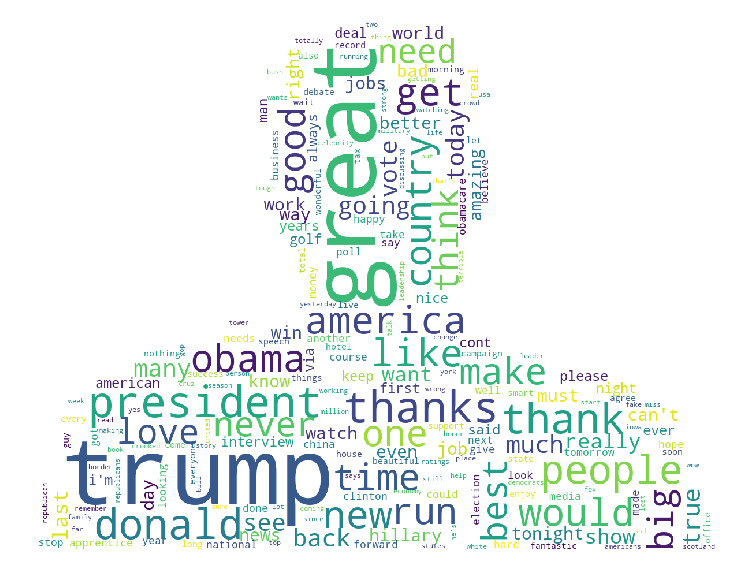

In [15]:
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from scipy.misc import imread

bg_pic = imread('img/trump2.jpg')
wc = WordCloud(background_color="white",
                      stopwords=stop,
                      mask=bg_pic,
                      scale=3,
                      max_words=2000,
                      max_font_size=100, 
                      random_state=42
                     ).generate_from_frequencies(FreqDist(tokens_original))

image_colors = ImageColorGenerator(bg_pic)

plt.figure(figsize=(32,10))
plt.imshow(wc)
plt.axis("off")
plt.show(wc.recolor(color_func=image_colors))

wc.to_file('img/trump_tweets_wordcloud.png')

In [18]:
FreqDist(tokens_original)

FreqDist({'donald': 1681,
          'trump': 4419,
          'wishing': 23,
          'everyone': 296,
          'wonderful': 271,
          'holiday': 39,
          'happy': 332,
          'healthy': 24,
          'prosperous': 10,
          'new': 1274,
          'year': 399,
          'let': 315,
          'think': 844,
          'like': 1275,
          'champions': 17,
          'international': 124,
          'tower': 228,
          'chicago': 171,
          'ranked': 12,
          'tallest': 9,
          'building': 174,
          'world': 533,
          'council': 37,
          'tall': 7,
          'buildings': 31,
          'urban': 5,
          'habitat': 1,
          'bountiful': 1,
          'thanksgiving': 29,
          'partners': 9,
          'tv1': 1,
          'reality': 73,
          'series': 27,
          'entitled': 8,
          "omarosa's": 1,
          'ultimate': 23,
          'merger': 7,
          'begun': 15,
          'ahead': 75,
          'schedule': 24,
  

In [16]:
import nltk
from nltk.collocations import *
 
#Create bigrams
bgs = nltk.bigrams(tokens_original)
 
#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)
bigram_fq = fdist.most_common()
bigram_fq_25 = {k:v for k,v in dict(bigram_fq[:25]).items()}
bigram_fq_25

{('america', 'great'): 489,
 ('art', 'deal'): 126,
 ("can't", 'wait'): 213,
 ('celebrity', 'apprentice'): 202,
 ('crooked', 'hillary'): 198,
 ('donald', 'trump'): 1138,
 ('fake', 'news'): 177,
 ('golf', 'course'): 130,
 ('good', 'luck'): 146,
 ('great', 'job'): 208,
 ('hillary', 'clinton'): 208,
 ('interview', 'discussing'): 125,
 ('last', 'night'): 256,
 ('looking', 'forward'): 144,
 ('make', 'america'): 468,
 ('new', 'hampshire'): 130,
 ('new', 'york'): 231,
 ('please', 'run'): 177,
 ('president', 'obama'): 151,
 ('run', 'president'): 391,
 ('think', 'like'): 141,
 ('trump', 'president'): 154,
 ('trump', 'tower'): 150,
 ('united', 'states'): 192,
 ('white', 'house'): 185}

In [17]:
# textblob will allow us to do sentiment analysis in a very simple way
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'